<a href="https://colab.research.google.com/github/dla9944/myPyCode/blob/main/221226_LightGBM_crediccard_%EC%82%AC%EA%B8%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🪐 LightGBM이란?

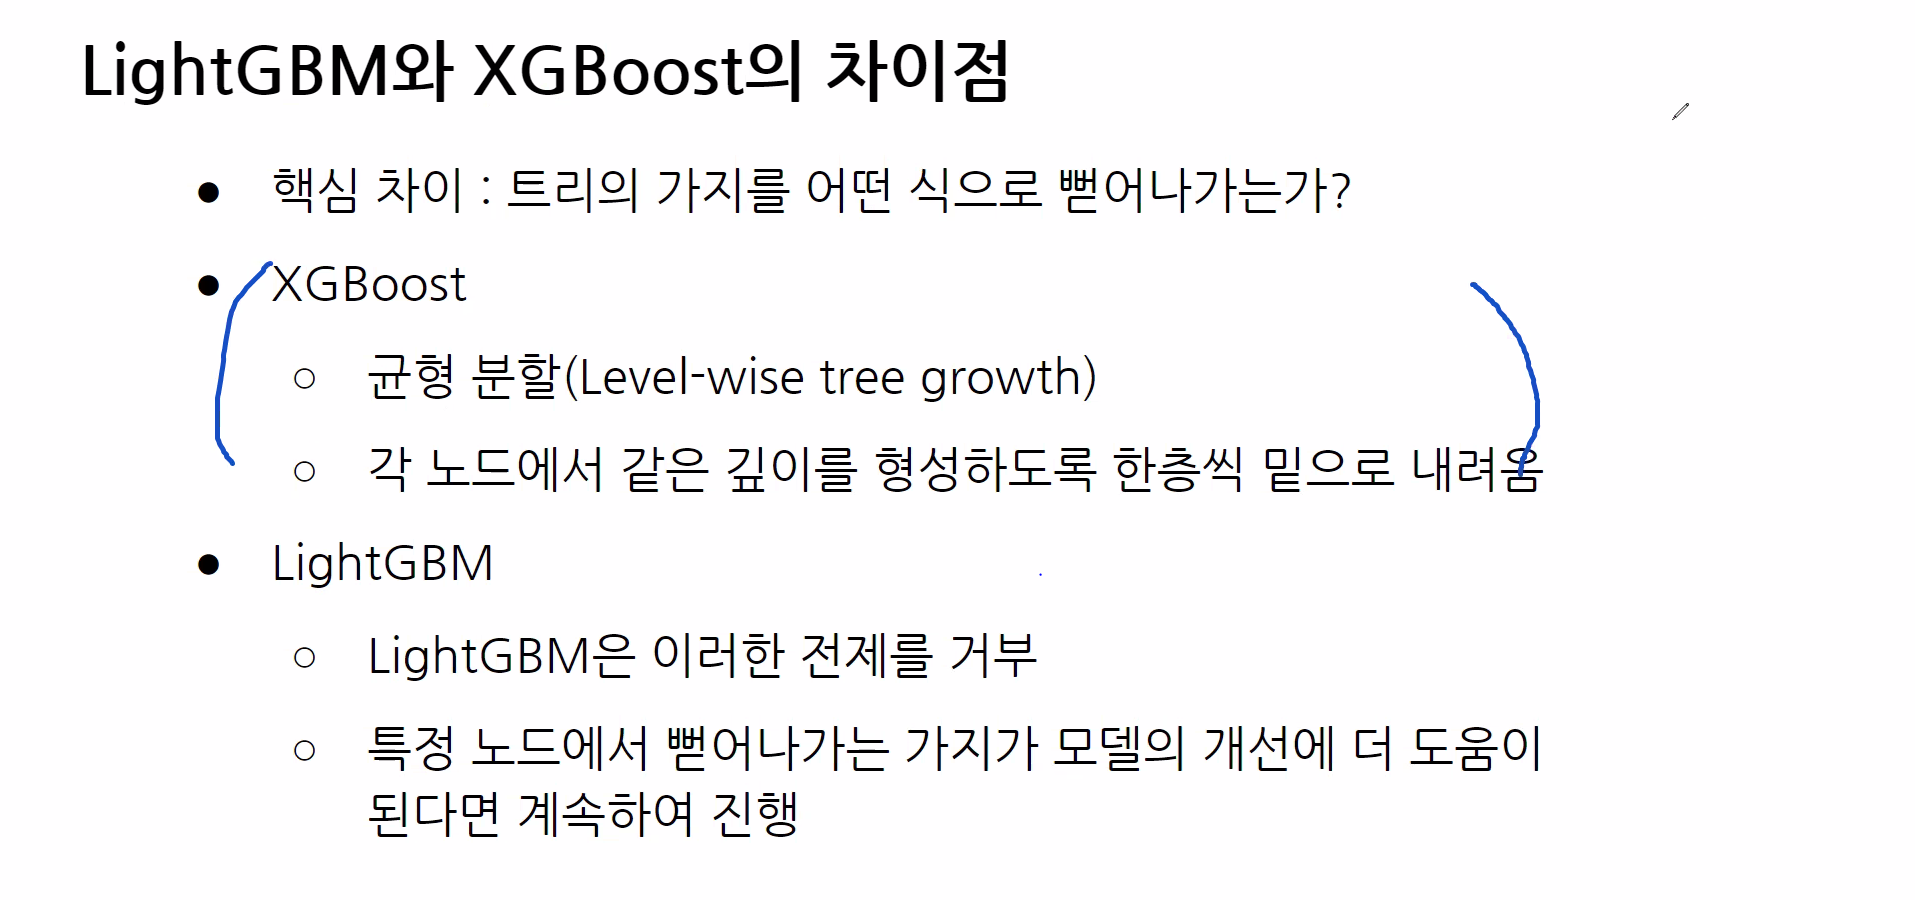


* XGBoost : 깊이가 최대한 똑같이 내려주려고 한다
* LightGBM : 지멋대로 노드 설정, 깊이도 지멋대로/


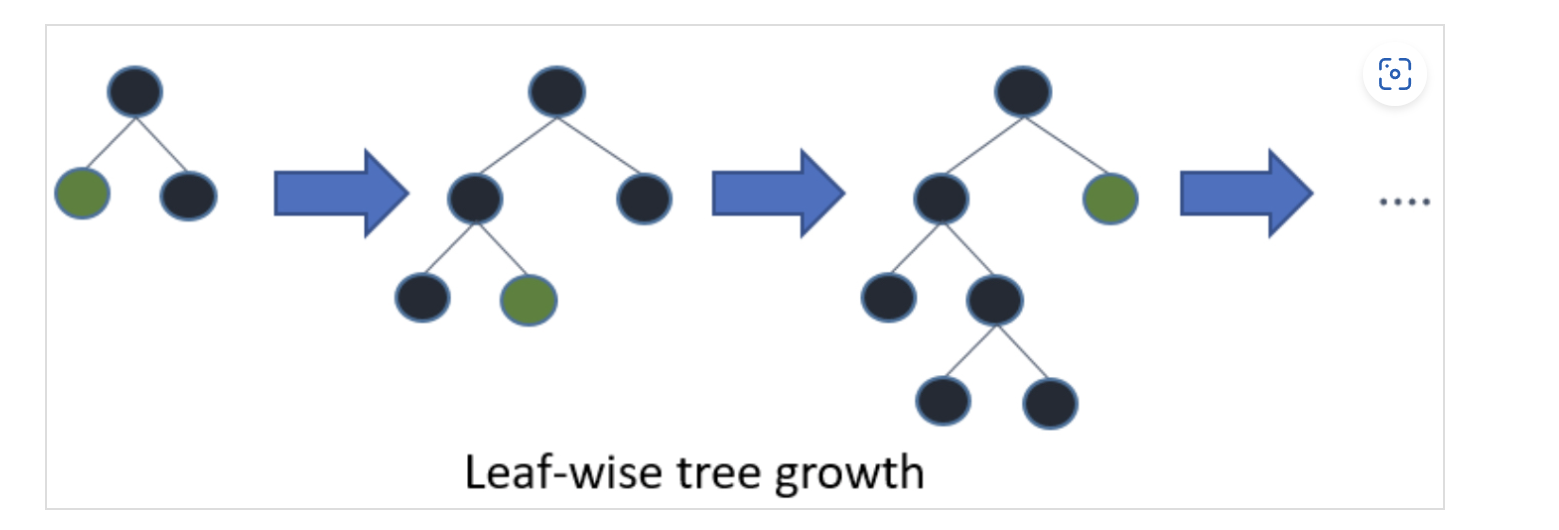

# 캐글에서 직접 데이터 로드

In [ ]:
from google.colab import files
# files.upload()

In [ ]:
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection
# 1. 개인 캐글 계정 이용

mv: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# 인증 및 파일 다운로드 받기
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

mv: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
kaggle datasets download -d kartik2112/fraud-detection

SyntaxError: ignored

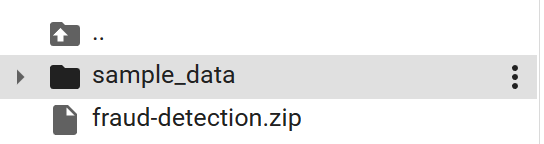

# 압축 풀기 & 합치기

# !unzip
* 파일 우측 클릭 > 경로 복사

In [ ]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


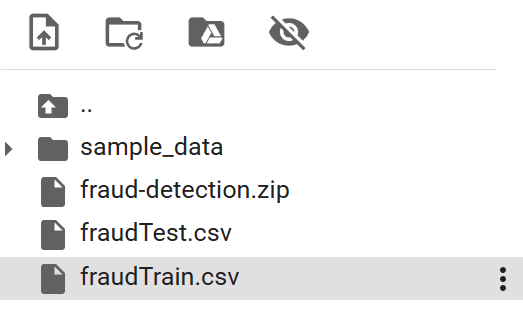

In [ ]:
# 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('fraudTrain.csv')

# #현재 경로에 있는 다른 파일/ 폴더를 불러오는 리눅스 명령어
# !ls

In [ ]:
train = pd.read_csv('fraudTrain.csv', index_col = 0)
# 첫번째 열을 인덱스 컬럼으로 지정

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1349243636.73,38.54,-90.23,0.01
std,1308806447000240384.00,160.32,26893.22,5.08,13.76,301956.36,12841278.42,5.11,13.77,0.08
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1338750742.50,34.73,-96.90,0.00
50%,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1349249747.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1359385375.50,41.96,-80.24,0.00
max,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,1371816817.00,67.51,-66.95,1.00


In [ ]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [ ]:
test = pd.read_csv('fraudTest.csv', index_col = 0)

# fraudTest도 동일한 작업

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
# 열이 일치하는 두 데이터를 위 아래로 합쳐준다 → pd.concat([합쳐줄 데이터프레임들])

# df = pd.concat([train, test]) # 주의

df = pd.concat([train, test], ignore_index=True) # 주의. 인덱스 리셋
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.49,-91.89,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.95,-91.33,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.04,-95.44,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.66,-96.19,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.20,-118.90,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.66,-119.72,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.63,-116.45,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.47,-117.08,0


In [ ]:
df.columns # 인덱스의 특징

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## 도메인 지식

* trans_date_trans_time : 거래 시간
* cc_num : 카드 번호. 고윳값이기 때문에 여기서는 id처럼 활용할 수 있음. 동명이인 이더라도 카드 번호는 다를것.
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt: 거래금액 (amount)
* first / last : 이름
* gender : 성별
* city / street / state / zip : 고객 거주지 정보
* lat / long : 고객 주소(zipcode)에 대한 위도 및 경도 (지구를 기준을 했을때 좌표값)
* city_pop : 고객의 zipcode 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프)
* merch_lat / merch_long : 상점의 위경도
---
* is_fraud : 사기거래 여부 (이상거래 여부) -> 종속변수

In [ ]:
#df.info() # not-null count가 나오지 않음(데이터 범위 초과)
df.info(show_counts=True) # 기본부터 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

## 데이터 분석

In [ ]:
df.describe() # int, float 수치형 데이터 관련 통계 데이터 표시

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [ ]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [ ]:
# amt : 거래금액
# city_pop : 고객의 주소에 속하는 인구수
# 선형 모델은 어려움. 거리 기반도 어려움

In [ ]:
df.describe(include='O') 
# Trans_date_trans_time : 거리시간, category : 거래 상점의 범주, dob : 생년월일

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


# 데이터 전처리

## 데이터셋

* Credit Card Transactions Fraud Detection Dataset
* 이상거래 (fraud) : 해킹이나 전산 오류 등으로 인해 잘못된 금액이 결제되는 경우
* 전산 측에서 갑작스러운 오류/ 전산상의 실수 데이터 등을 잡아내서 이상거래를 분리하는 데이터셋
* 카드 결제 데이터셋 → is_fraud (예측값, 종속변수)

In [ ]:
# 사용하지 않는 변수를 제거하는 벙법

# df.drop(axis = 1) : 원본을 안바꿔 주는것
# 1. df =df.drop(axis = 1) :
# 깊은 복사, 얕은 복사 문제때문에 가능하면 새로운 사본을 만들어서 처리(immutable)
# 2. df.drop(axis = 1, inplace = True) : 원본을 바꿔주는 것
# pd : 판다스 자체에서 불러오는 것이기 때문에 inplace X

In [ ]:
df.drop(['first', 'last', # 이름 -> 이름 조합을 만들어서 full name / cc_num 고객은 특정 가능
         'street', 'city', 'state', 'zip', # 주소 -> 위도경도(lat, long)
         'trans_num', 'unix_time', # 거래번호 / 유닉스타임 (중복) -> trans_date_trans_time
         'job', 'merchant' # 직업, 가게명
         ], axis=1, inplace=True)

## trans_date_trans_time 처리

In [ ]:
# 이 object를 int로 바꿔줘야함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   lat                    float64
 6   long                   float64
 7   city_pop               int64  
 8   dob                    object 
 9   merch_lat              float64
 10  merch_long             float64
 11  is_fraud               int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [ ]:
# 문자열 형태의 날짜 데이터를 format이 datetime으로 변형
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


## 피쳐 엔지니어링

* 이상 거래 : 원래 고객의 거래패턴에서 벗어나는 거래

## 결제 금액
* 평균에서 벗어난다 →정규분포(z점수)얼마나 멀리 벗어나 있는지로 확인함
* 서로 다른 개인을 구별하는 방법 : cc_num(카드번호) 별로 묶어서 그룹화. 
A그룹(한 명)의 결제금액 평균을 계산함.
일상적으로 결제하는 계산금액보다 갑자기 큰 금액을 결제했다면 그 거래를 이상 거래로 구별하기로 함.

In [ ]:
# (groupby로 묶어준 그룹/속성).agg 특정한 그룹별로 통계값, 대표값 추출
# mean : 통계값 / std : 표준편차 / z점수 : (x값 - 평균)/ 표준편차 : 평균으로부터 얼마나 떨어져있는지 표준화한 값
amt_info = df.groupby('cc_num').amt.agg(['mean','std'])
amt_info.head()

,mean,std
cc_num,,
60416207185,59.26,142.87
60422928733,65.48,92.04
60423098130,96.38,1000.69
60427851591,107.49,131.01
60487002085,64.10,153.21


In [ ]:
# 카드번호별로 평균 소비액, 표준편차

In [ ]:
# 두개의 데이터프레임을 열 방향으로 합쳐줄 때 → pd.merge
# A.merge(B) : A가 왼쪽, B가 오른쪽으로 해서 두 DF를 합쳐줌

# 같은 cc_num을 가진 거래기록과, cc_num별 소비기록 평균 및 표준편차를 매칭
# 거래 기록 수 : cc_num보다 많을 것. 같은 cc_num을 가졌을 경우, 같은 평균과 표준편차를 공유
df = df.merge(amt_info, left_on = 'cc_num', right_index = True, how = 'left') # how = left : A,B 쪽 중에서 A가 있는 쪽을 선택해서 합쳐주겠다
df

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.08,-81.18,3495,1988-03-09,36.01,-82.05,0,89.41,127.53
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.89,-118.21,149,1978-06-21,49.16,-118.19,0,56.08,159.20
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.18,-112.26,4154,1962-01-19,43.15,-112.15,0,69.92,116.69
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.23,-112.11,1939,1967-01-12,47.03,-112.56,0,80.09,280.08
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.42,-79.46,99,1986-03-28,38.67,-78.63,0,95.34,94.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.49,-91.89,519,1966-02-13,39.95,-91.33,0,62.35,110.82
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.04,-95.44,28739,1999-12-27,29.66,-96.19,0,50.45,168.36
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.20,-118.90,3684,1981-11-29,46.66,-119.72,0,88.70,119.95
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.63,-116.45,129,1965-12-15,44.47,-117.08,0,61.00,89.53


In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'mean', 'std'],
      dtype='object')

In [ ]:
# amt : 각 거래기록별 소비량 / mean: cc_num별 평균 소비 금액/ std : cc_num별 소비금액의 표준편차

# z점수 : 특정한 값이 평균 기준으로 얼마나 멀리 떨어져 있는지 계산
# z-score = (amt/mean)/std
df[['cc_num','amt','mean','std']].head()

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.41,127.53
1,630423337322,107.23,56.08,159.20
2,38859492057661,220.11,69.92,116.69
3,3534093764340240,45.00,80.09,280.08
4,375534208663984,41.96,95.34,94.32


In [ ]:
# z-score = (amt/meat)/std
# 벡터화 연산 (행들을 연산)

df['amt_z_score'] = (df['amt'] - df['mean']) /df['std']

In [ ]:
# 특정한 amt값이 평균 대비 얼마나 떨어져 있는지 확인(부호 : 어느방향인지 표시)
df['amt_z_score'].head() # 3~-3까지의 값

0   -0.66
1    0.32
2    1.29
3   -0.13
4   -0.57
Name: amt_z_score, dtype: float64

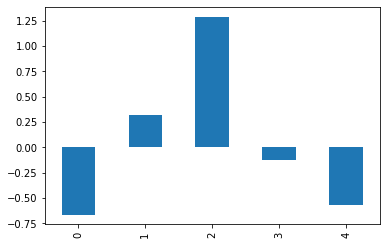

In [ ]:
df['amt_z_score'].head().plot(kind='bar')

In [ ]:
# z-score를 산출하기 위해 쓰인 열들을 drop
df.drop(['mean','std'], axis = 1, inplace=True)

## 범주별 결제금액

* cc_num : 카드번호별 / category : 상점의 분류별 범주

In [ ]:
# 2개 이상의 그룹으로 나눌때 : df.groupby([열 이름들])
category_info = df.groupby(['cc_num', 'category']).amt.agg(['mean', 'std']).reset_index()
category_info # cc_num, category별로 -> 평균값 (결제액), 표준편차

,cc_num,category,mean,std
0,60416207185,entertainment,51.84,65.49
1,60416207185,food_dining,26.74,46.38
2,60416207185,gas_transport,59.78,15.76
3,60416207185,grocery_net,52.15,17.69
4,60416207185,grocery_pos,101.56,21.89
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.00,167.23
13167,4992346398065154184,personal_care,48.78,49.52
13168,4992346398065154184,shopping_net,86.28,217.05
13169,4992346398065154184,shopping_pos,64.21,169.24


In [ ]:
# df와 category_info를 합칩니다. cc_num과 category를 기준으로 결합
# mean, std를 기준
df = df.merge(category_info, on=['cc_num', 'category'], how = 'left')
# cc_num, category/mean, std/amt → z-score

In [ ]:
df[['cc_num','category','amt','mean','std']].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.86,116.07
1,630423337322,grocery_pos,107.23,99.64,23.90
2,38859492057661,entertainment,220.11,46.65,60.39
3,3534093764340240,gas_transport,45.00,61.54,15.75
4,375534208663984,misc_pos,41.96,35.48,4.93


In [ ]:
# 범주별 결제금액 z-score
# Z-SCORE가 2.58 (99%), 1.69면 95%
# 2를 넘어가면 수상함
df['cat_z_score']  = (df['amt']-df['mean'])/df['std']
df['cat_z_score']

0         -0.69
1          0.32
2          2.87
3         -1.05
4          1.31
           ... 
1852389   -0.05
1852390    1.16
1852391    0.44
1852392   -0.01
1852393   -0.38
Name: cat_z_score, Length: 1852394, dtype: float64

In [ ]:
df['is_fraud'][3]

0

In [ ]:
# z-score를 산출하기 위해 쓰인 열들을 drop
# 주의
df.drop(['mean','std'], axis = 1, inplace=True)

## 위도(latitude) & 경도(longitude) 처리
(거리 산출)

In [ ]:
# 두 지점간의 거리 → 지구가 갖는 성질
# geopy 사용
# 위도 (lat), 경도(long)으로 사용
# geopy.distance.distance((lat1, lng1), (lat2, lng2)) → 거리

In [ ]:
# coordinate(좌표) : 위도, 경도
# 좌표는 위도*경도로 표현 - 
# 1. 상점의 위도경도 (merchant)
# 2. 고객의 위도경도 (customer)


df['merch_coord']= pd.Series(zip(df.merch_lat, df.merch_long))
df['cust_coord'] = pd.Series(zip(df['lat'], df['long']))
# zip → 2개 이상의 리스트를 원소 순서대로 묶어줌

In [ ]:
import geopy.distance # 거리 구하는 파이썬 라이브러리

def get_distance(row):
  # a 지점 : 상점 위도경도
  # b 지점 : 고객 위도경도
    coord1 = row['merch_coord'] # [lat, long] 상점
    coord2 = row['cust_coord'] # [lat, long] 고객
    return geopy.distance.distance(coord1, coord2).km

In [ ]:
# 주의 : 7분 소요
df['distance']= df.apply(get_distance, axis=1)

In [ ]:
df['distance'] # km 분할시킴

0          78.77
1          30.22
2         108.10
3          95.69
4          77.70
           ...  
1852389    77.03
1852390   100.02
1852391    80.89
1852392    53.06
1852393    72.38
Name: distance, Length: 1852394, dtype: float64

In [ ]:
df2 = df.copy()
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.08,-81.18,3495,1988-03-09,36.01,-82.05,0,-0.66,-0.69,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.77
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.89,-118.21,149,1978-06-21,49.16,-118.19,0,0.32,0.32,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.22
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.18,-112.26,4154,1962-01-19,43.15,-112.15,0,1.29,2.87,"(43.150704, -112.154481)","(42.1808, -112.262)",108.10
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.23,-112.11,1939,1967-01-12,47.03,-112.56,0,-0.13,-1.05,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.69
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.42,-79.46,99,1986-03-28,38.67,-78.63,0,-0.57,1.31,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.70


In [ ]:
# .km 빼먹고 했을 경우
# 78.77 km => 78.77 / km => 78.77 (string) => float
# df['distance'] = df['distance'].str.split(expand=True)[0].astype('float64')

In [ ]:
# 거주 위치와 결체 위치가 너무 차이날 경우
# z-score 구하기

distance_info = df.groupby('cc_num').agg(['mean','std']).distance

In [ ]:
distance_info

,mean,std
cc_num,,
60416207185,73.53,28.70
60422928733,78.99,29.30
60423098130,77.83,28.19
60427851591,75.71,28.98
60487002085,79.44,28.77
...,...,...
4958589671582726883,76.74,29.12
4973530368125489546,78.75,29.45
4980323467523543940,72.27,28.28


In [ ]:
# 1번 방법
# distance_info = distance_info.reset_index()
# df = df.merge(distance_info, on = 'cc_num', how = 'left')

# 2번 방법
df = df.merge(distance_info, left_on='cc_num', right_index=True, how='left')

In [ ]:
# z_score : 평균을 0으로 뒀을 때 얼마나 떨어있는지를 표준화 (z점수, 표준정규분포)
df['distance_z_score'] = (df['distance'] - df['mean']) / df['std']

In [ ]:
df['distance_z_score'].head()

0    0.03
1   -1.48
2    1.16
3    0.82
4    0.06
Name: distance_z_score, dtype: float64

In [ ]:
# 사용한 통계치 drop
df.drop(['mean', 'std'], axis=1, inplace=True)

In [ ]:
df.isna().mean()

trans_date_trans_time   0.00
cc_num                  0.00
category                0.00
amt                     0.00
gender                  0.00
lat                     0.00
long                    0.00
city_pop                0.00
dob                     0.00
merch_lat               0.00
merch_long              0.00
is_fraud                0.00
amt_z_score             0.00
cat_z_score             0.00
merch_coord             0.00
cust_coord              0.00
distance                0.00
distance_z_score        0.00
dtype: float64

## 생년월일(dob) → 나이

In [ ]:
df['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [ ]:
# # year 없어서 에러
# pd.to_datetime(df['dob'])

pd.to_datetime(df['dob']).dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [ ]:
df['age'] = 2022 - pd.to_datetime(df['dob']).dt.year # 만 나이

In [ ]:
df.age

0          34
1          44
2          60
3          55
4          36
           ..
1852389    56
1852390    23
1852391    41
1852392    57
1852393    29
Name: age, Length: 1852394, dtype: int64

## 범주형 변수처리

In [ ]:
# 필요없는 열 삭제
df.drop(['cc_num', 'lat','long','merch_lat','merch_long', 'dob', 
         'merch_coord' , 'cust_coord'], axis = 1, inplace = True)

In [ ]:
# 더미 변수 생성

df.describe(include='O')

,category,gender
count,1852394,1852394
unique,14,2
top,gas_transport,F
freq,188029,1014749


In [ ]:
df = pd.get_dummies(df, columns = df.describe(include= 'O').columns, drop_first = True)

In [ ]:
df

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.66,-0.69,78.77,0.03,34,0,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.32,0.32,30.22,-1.48,44,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.29,2.87,108.10,1.16,60,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,45.00,1939,0,-0.13,-1.05,95.69,0.82,55,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,41.96,99,0,-0.57,1.31,77.70,0.06,36,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.17,-0.05,77.03,0.05,56,0,...,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.36,1.16,100.02,0.69,23,0,...,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.02,0.44,80.89,0.29,41,0,...,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.59,-0.01,53.06,-0.73,57,0,...,0,0,0,0,0,0,0,0,1,1


# 모델링

In [ ]:
# 과거의 이상거래를 사용해서 미래의 이상거래를 감지.
# 시간 단위로 훈련셋/ 시험셋을 나눠줘야 함

# 날짜 단위이기 때문에 GridSearchCV, train_test_split 사용 불가
# 날짜 단위로 나눠주어야 함

In [ ]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1852384, 1852385, 1852386, 1852387, 1852388, 1852389, 1852390,
            1852391, 1852392, 1852393],
           dtype='int64', length=1852394)

In [ ]:
# trans_date_trans_time -> dt 인덱스
df.set_index('trans_date_trans_time', inplace=True)

In [ ]:
df.index # 2020-07-01 이전, 이후 데이터 나눠서 

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [ ]:
train = df[df.index < '2020-07-01'] # 2020년 7월 1일 이전 데이터 (경계 미포함)
test = df[df.index >= '2020-07-01'] # 2020년 7월 1일 이후 데이터 (경계 포함)

In [ ]:
# 예측값(종속변수, y) : is_fraud
# 관측값(독립변수, X) : 나머지
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
import lightgbm as lgb

In [ ]:
# 연속형 변수를 예측하는 '회귀' 문제를 푼다면 lgb.LGBMRegressor
# 범주형 변수를 예측하는 '분류' 문제를 푼다면 lgb.LGBMClassifier
model = lgb.LGBMClassifier(random_state=26)

In [ ]:
df.describe()

,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,1852394.00,1852394.00,1852394.00,1852394.00,1852175.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,...,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,70.06,88643.67,0.01,0.00,0.00,76.11,-0.00,48.71,0.07,0.10,...,0.07,0.09,0.09,0.05,0.06,0.07,0.08,0.09,0.03,0.45
std,159.25,301487.62,0.07,1.00,1.00,29.09,1.00,17.39,0.26,0.30,...,0.25,0.29,0.28,0.22,0.24,0.26,0.26,0.29,0.17,0.50
min,1.00,23.00,0.00,-2.83,-12.87,0.02,-2.78,17.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.64,741.00,0.00,-0.38,-0.53,55.34,-0.71,35.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,47.45,2443.00,0.00,-0.18,-0.24,78.25,0.08,47.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,83.10,20328.00,0.00,0.09,0.29,98.47,0.77,60.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,28948.90,2906700.00,1.00,63.42,18.90,151.87,2.63,98.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(random_state=26)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9965186688759485

In [ ]:
1 - df.is_fraud.mean()

0.9947899852839083

# 평가


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
# 실제 y값, 예측 y값을 넣어주면 confusion matrix를 그려주는 함수

def confusion_matrix_view(y_test, pred):
    plt.figure(figsize = (11,7))
    cf_matrix = confusion_matrix(y_test, pred) # 배열
    # [  [ TN , FP    ]
    # [    FN , TP ]  ]
    #
    print(cf_matrix)
    group_names = ['TN','FP','FN','TP'] # 각기 4개의 그룹으로 분류 . TN : true negative/ TP : true positive
    # FN : false negative (miss, 2종 오류) FP : false positive (false alarm, 1종 오류)
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()] # 그룹별 갯수 / arr.flatten() → 한 줄로
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)] # 그룹별 비중, 비율
                        # flatten → 2x2 → 4 → 합계로 나눠준 것
    # v1 : 그룹명 → 이진분류(TN, TP, FN, FP)
    # v2 : 그룹별 갯수
    # v3 : 그룹별 비중(비율)
    # \n : 줄바꿈

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2) # 투 바이 투로 바꿔줌 (TN, FP, 
                                             #                      FN, TP)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    print(classification_report(y_test, pred))

[[522602   1047]
 [   783   1229]]


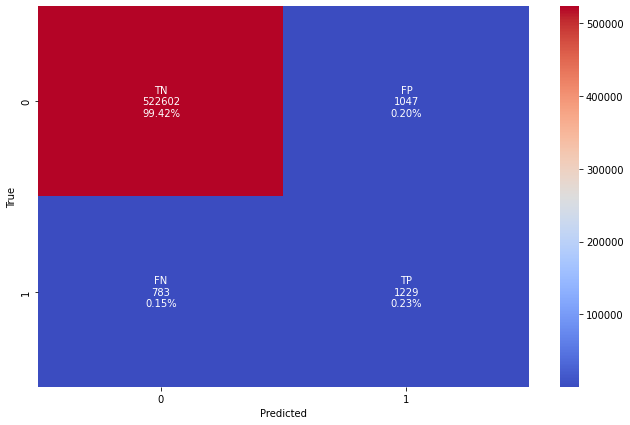

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
confusion_matrix_view(y_test, pred)

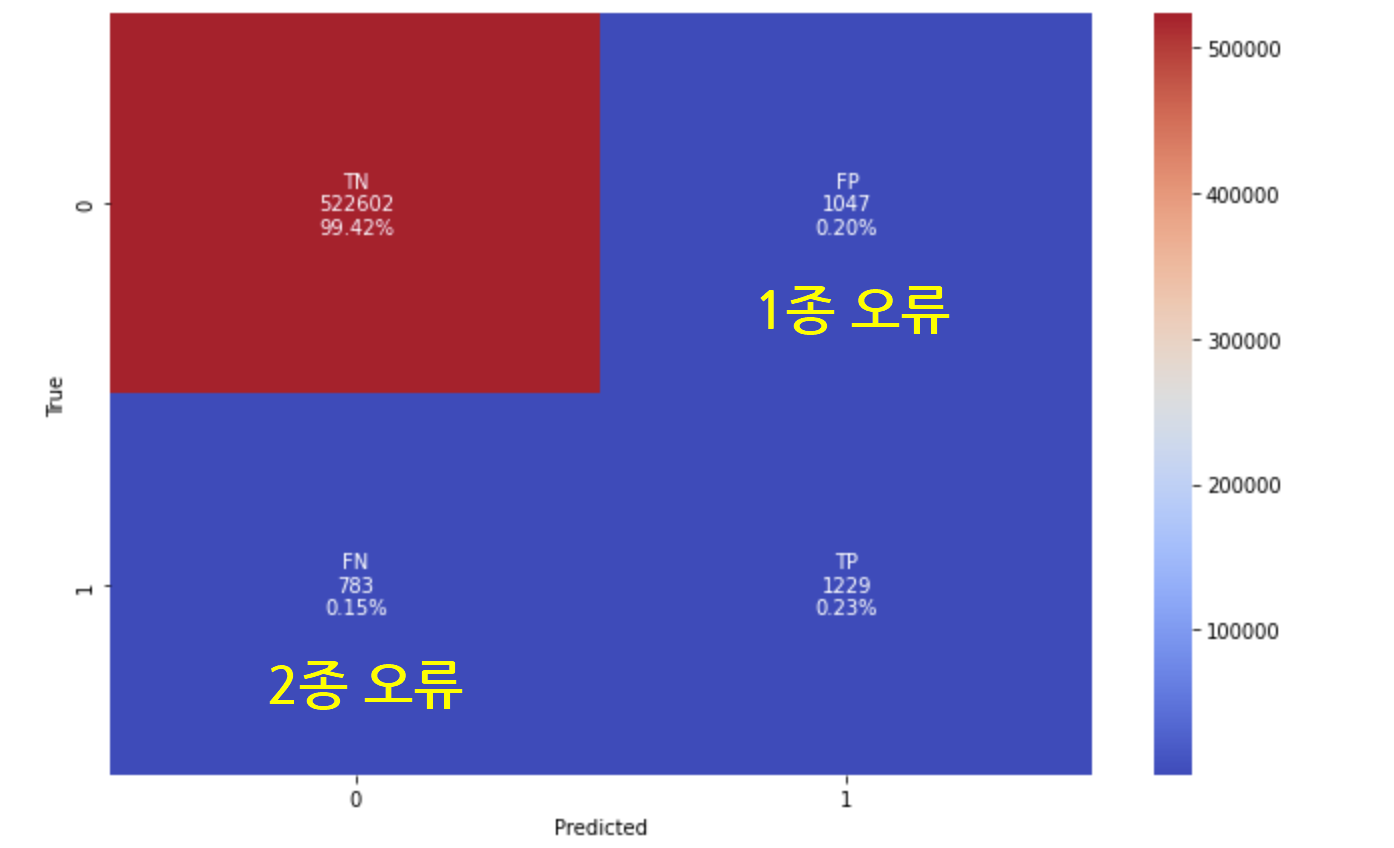

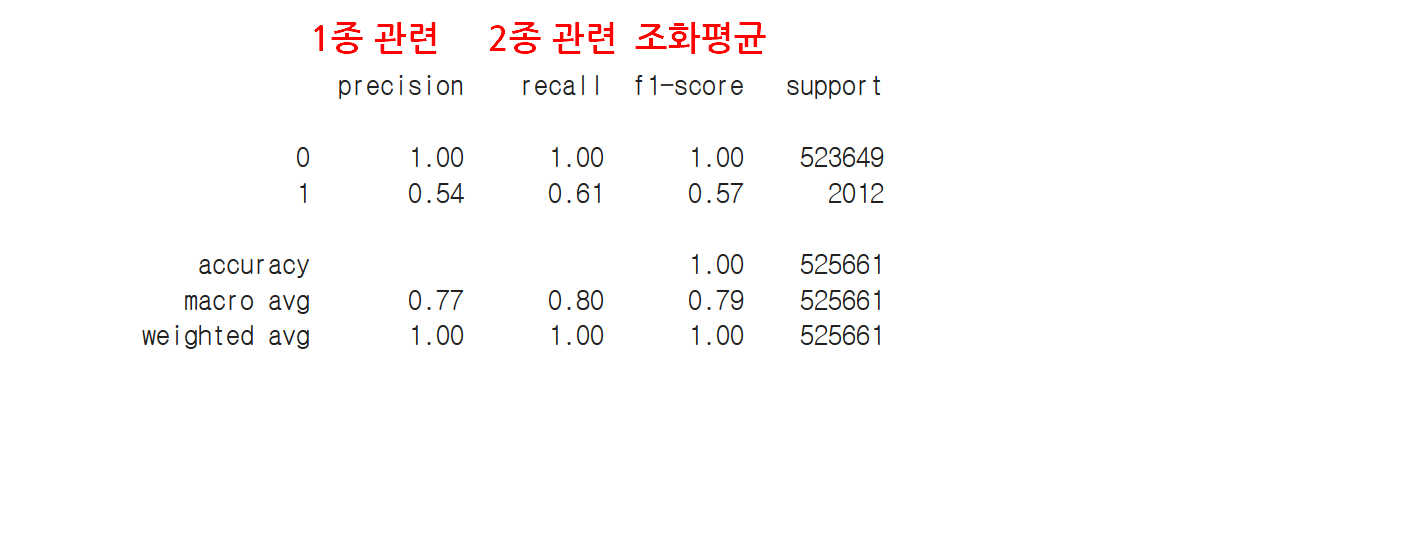

In [ ]:
# 정밀도 = precision - 1종 오류 (FP)
# 재현율 = recall - 2종 오류 (FN)
# f1-score : 두 수치의 영향력을 모두 확인할 수 있는 지표

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0, 1로 분류 : 분류되기 전 얼마나 각각의 확률이 산출되는지 
model.predict_proba(X_test)

array([[9.99875434e-01, 1.24566042e-04],
       [9.99877296e-01, 1.22704031e-04],
       [9.99869010e-01, 1.30989526e-04],
       ...,
       [9.99868033e-01, 1.31966775e-04],
       [9.99337678e-01, 6.62322460e-04],
       [9.99834092e-01, 1.65908474e-04]])

In [ ]:
proba = model.predict_proba(X_test)
proba

array([[9.99875434e-01, 1.24566042e-04],
       [9.99877296e-01, 1.22704031e-04],
       [9.99869010e-01, 1.30989526e-04],
       ...,
       [9.99868033e-01, 1.31966775e-04],
       [9.99337678e-01, 6.62322460e-04],
       [9.99834092e-01, 1.65908474e-04]])

In [ ]:
# 각 행 -> 입력받은 시험셋의 행 데이터별로, 각각의 분류가 될 확률
# 2차원 행열 -> 각각 열
# 1(0)열 : 0에 대한 예측값 (확률값)
# 2(1)열 : 1에 대한 예측값 (확률값)
proba = model.predict_proba(X_test)
proba

array([[9.99875434e-01, 1.24566042e-04],
       [9.99877296e-01, 1.22704031e-04],
       [9.99869010e-01, 1.30989526e-04],
       ...,
       [9.99868033e-01, 1.31966775e-04],
       [9.99337678e-01, 6.62322460e-04],
       [9.99834092e-01, 1.65908474e-04]])

In [ ]:
# numpy 인덱싱 -> [행, 열] -> [:]
proba[:, 1] # 예측값이 1이 될 학률 / 이상거래일 확률
proba[:, 1] # 예측값이 1이 될 학률 / 이상거래일 확률
p

array([0.00012457, 0.0001227 , 0.00013099, ..., 0.00013197, 0.00066232,
       0.00016591])

In [ ]:
# default : 0.5보다 크면 1로 분류

#민감하게 or 둔감한 처리

# case 1 = 0.2만 넘으면 1로 분류(느슨한)
# case 2= 0.8만 넘으면 1로 분류(엄격함)

# 벡터화 연산으로 비교 연산 (>0.2) → T/F → astype(int)/0/1

proba_int1 = (proba > 0.2).astype('int')# 해외인 것
proba_int1

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

## 0과 1로 구성되어 있는 데이터에 평균을 내면 1의 비중을 알수 있음
#* 예측치로 환산한다면, 이상거래로 분류된 비중



In [ ]:
pred.mean() # 기준이 0.5일 때 예측치

0.004329786687618065

In [ ]:
proba_int1.mean()# 기준이 0.2일 때의 예측치

0.5017283001782518

In [ ]:
proba_int2 = (proba > 0.8).astype('int')
proba_int2

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
proba_int2.mean() # 기준이 0.8일 때의 예측치

0.49827169982174824

In [ ]:
proba_int2.mean()

0.49827169982174824

[[522602   1047]
 [   783   1229]]


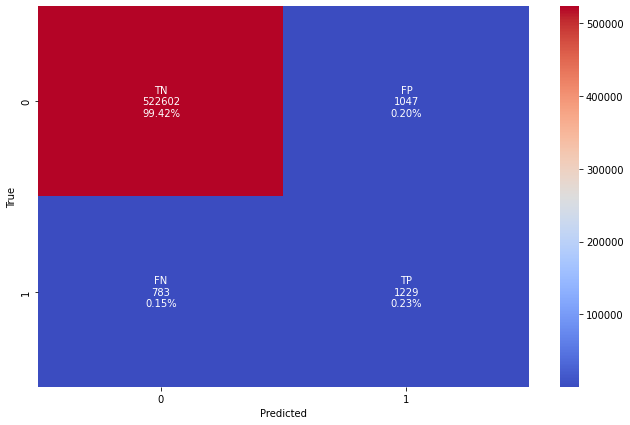

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.5 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, pred)

In [ ]:
# 0.2 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, proba_int1)
# FP가 늘었음 (1종 오류가 늘었음 -> 이상거래가 아닌데 맞다고 판단한 것이 늘었음)
# FN은 줄었음 (2종 오류가 줄엇음 -> 이상거래 맞는데 아니라고 판단한 것이 줄었음)

ValueError: ignored

<Figure size 792x504 with 0 Axes>

In [ ]:
# 0.2 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test, proba_int2)
# FP가 늘었음 (1종 오류가 늘었음 -> 이상거래가 아닌데 맞다고 판단한 것이 늘었음)
# FN은 줄었음 (2종 오류가 줄엇음 -> 이상거래 맞는데 아니라고 판단한 것이 줄었음)

## ROC 곡선 & AUC

* 이진분류 모델을 평가하는 방법
* 기준점에 영향을 받지 않으므로 여러 모델을 비교할 때 요긴하게 사용
* ROC 곡선부터

* [참고](https://losskatsu.github.io/machine-learning/stat-roc-curve/#2-%EB%AF%BC%EA%B0%90%EB%8F%84%EC%99%80-%ED%8A%B9%EC%9D%B4%EB%8F%84)
* 이진분류 모델을 평가하는 방법으로 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용
* AUC는 ROC 곡선의 아래 면적을 의미
    * 0.5~1 사이의 값을 지니며 높을수록 좋은 모델

## 😂 ROC 곡선
> 민감도, 특이도 개념을 활용

### 민감도 (TPR)
$TPR = \frac{TP(참 양성)}{TP(참 양성) + FN(거짓 음성)}$
* 재현율과 수식이 같음
* 실제 1인 것 중 얼마만큼 제대로(1로) 예측되었는지
* 1에 가까울 수록 좋은 수치

### 특이도 (TNR) **
$TNR = \frac{TN(참 음성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 제대로(0로) 예측되었는지
* 1에 가까울 수록 좋은 수치

$FPR = \frac{FP(거짓 양성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 잘못(1로) 예측되었는지
* 0에 가까울 수록 좋은 수치
$FPR = 1 - TNR$

![ROC](https://i.imgur.com/euCumVh.png)
* 기준점을 바꿨을 때 TPR, FPR이 어떻게 바뀌는지 보여주는 그래프
* 최악의 경우 (학습이 전혀 안될 경우) -> 빨간색 점선

### AUC (Area Under the ROC Curve)
* ROC 곡선의 아래쪽에 해당하는 면적
* 0.5~1 사이의 값을 가지며 커질 수록 더 좋은 분류기라는 의미
![AUC](https://i.imgur.com/udlCMW4.png)

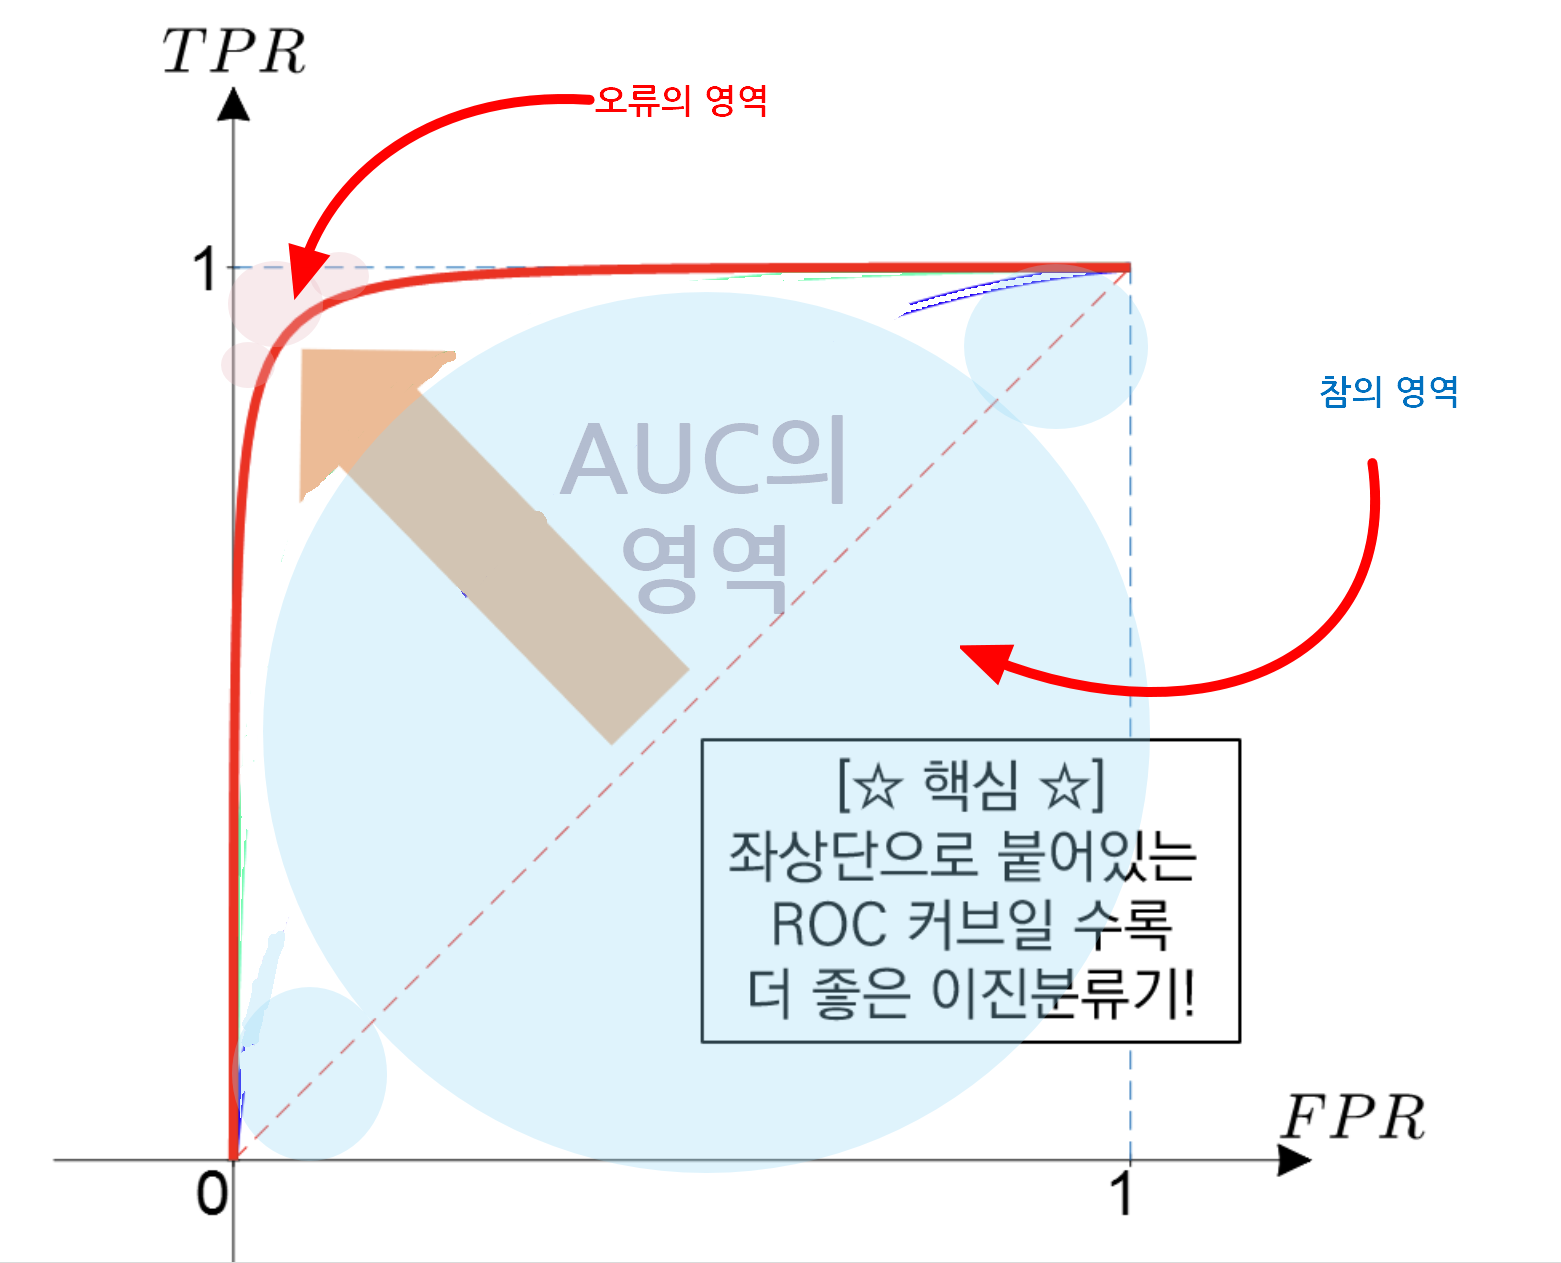

In [262]:
# 0과 1을 얼마나 잘 분류하는지(성능이 좋은지) 확인
# proba = 1이 될 확률
roc_auc_score(y_test, proba)

0.9614512689355635

## 하이퍼 패러미터 튜닝

* 그리드 서치 : 주입할 패러미터 목록들을 딕셔너리 형태로 넣어서, 각각의 패러미터들을 모두 조합한 모델들을 학습시켜서 최적의 모델을 찾는 것

* 다 시도해도 결국은 시간낭비일 수 있음
* 신속하게 패러미터 조합이 필요할 때 랜덤 서치를 사용

> 랜덤서치 : 더 넓은 영역의 하이퍼 패러미터 값을 <br>더 짧은 시간안에 다양하게 활용할 수 있게 일부만 추출해서 모델링함. → 시간이 더 축소됨

## 😅RandomSearch(랜덤 서치 )

In [264]:
from sklearn.model_selection import RandomizedSearchCV

In [265]:
# 랜덤 서치에 사용될 패러미터(딕셔너리) 정의
params = {
    "n_esimators": [100, 500, 1000], # 총 생성할 트리 갯수
    "learning_rate": [0.01, 0.05, 0.1, 0.3], # 경사하강법에 적용할 학습률 (오차 수정범위)
    # 너무 작으면 오버피팅, 시간 과다/ 너무 크면 학습이 약해짐
    "lambda_l1": [0, 10, 20, 30, 50], 
    "lambda_l2": [0, 10, 20, 30, 50],
    # 경사하강법 관련 → 오버피팅 줄이기
    "max_depth": [5, 10, 15, 20], # 트리의 최대깊이
    "subsmaple": [0.6, 0.8, 1] # 일부의 데이터만 사용해서 트리 제작 (1 : 전체)
}

## L1 정규화(lambda_l1)와 L2 정규화(lambda_l2)
* 라쏘 회귀(lasso regression) - L1 정규화
* 릿지 회귀(rigde regression) - L2 정규화
> 둘 다 매개 변수에 패널티를 가해서 그 영향력(계수)을 감소 시키는 방법.<br>
오버피팅을 방지하는 목적으로 쓰임

In [266]:
model2 = lgb.LGBMClassifier(random_state = 26)
# CV ( =학습에 쓰일 모델 , param_distributions = 랜덤 서치에 쓰일 패러미터들, n_iter = 몇 번 조합을 추출할지
# scoring = 모델 간 비교수치, n_jobs = 코어갯수)
rs = RandomizedSearchCV(model2, param_distributions = params , n_iter=30,
                        scoring='roc_auc', random_state = 26, n_jobs = -1)

In [267]:
# 시간 측정
# 26분 가량 소요
import time
start = time.time()

rs.fit(X_train,y_train)
print(time.time() - start)

1526.0799968242645


In [268]:
rs.best_params_

{'subsmaple': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10}

In [269]:
rs.best_score_

0.9940683753009398

In [270]:
rs_proba = rs.predict_proba(X_test)

In [271]:
# rs_proba[:,1] : proba : 0열 → 0이 될 확률. 1열 → 1이 될 확률
# [모든 행 중에서, 1번째 열] → 1이 될 확률만 호출해요
roc_auc_score(y_test, rs_proba[:,1])

0.9941047989147663

[[523307    342]
 [   838   1174]]


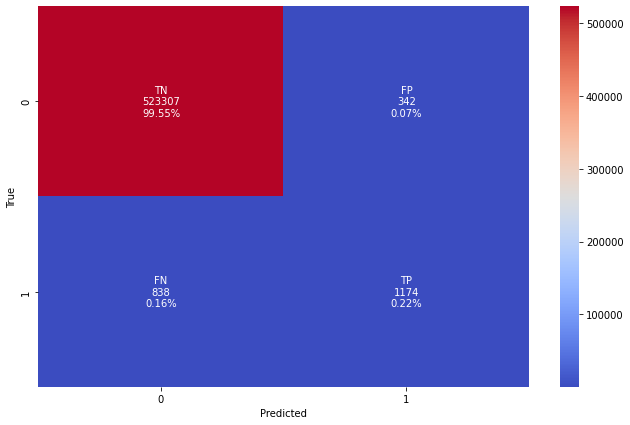

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.77      0.58      0.67      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.79      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [276]:
# 혼동행렬 그래프 생성 confusion_matrix_view (바꾸기 전)
confusion_matrix_view(y_test, rs.predict(X_test))

In [272]:
# 0.2로 조금 더 느슨하게 만듭니다.

rs_proba_int1 = (rs_proba[:,1] > 0.2).astype('int') # 1이 될 확률이 0.2만 넘어가도 1로 취급해요


[[522346   1303]
 [   472   1540]]


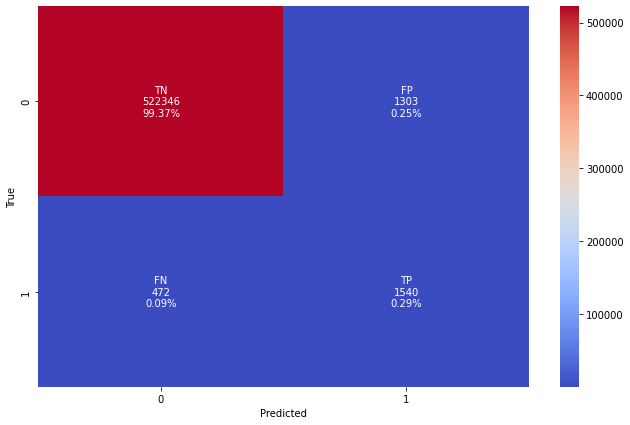

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.77      0.63      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.88      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [273]:
# 혼동행렬 그래프 생성 confusion_matrix_view (느슨한 후)
confusion_matrix_view(y_test, rs_proba_int1 )

In [277]:
# 0.8로 조금 더 엄격하게 만듭니다.

rs_proba_int2 = (rs_proba[:,1] > 0.8).astype('int') # 1이 될 확률이 0.8만 넘어가도 1로 취급해요
# 정밀도를 높이고 재현율 희생

[[523632     17]
 [  1228    784]]


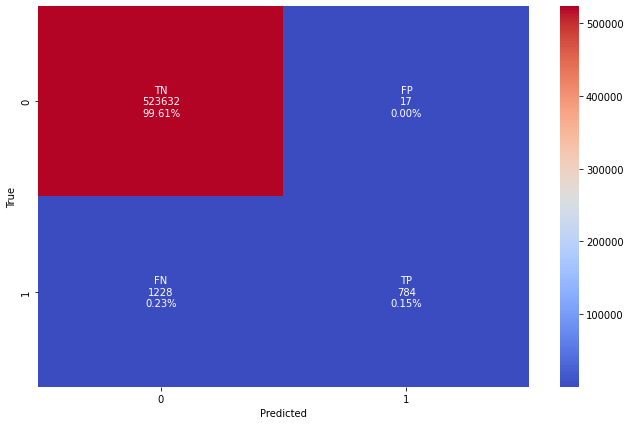

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.98      0.39      0.56      2012

    accuracy                           1.00    525661
   macro avg       0.99      0.69      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [278]:
# 혼동행렬 그래프 생성 confusion_matrix_view (엄격한 후)
confusion_matrix_view(y_test, rs_proba_int2 )

## model.train() 함수

# 현재 미사용
||train|fit|
|-|-|-|
|검증셋|모델링 - 검증셋|검증 X|
|데이터셋|데이터프레임->별도포맷변환|데이터프레임,시리즈|
|하이퍼패러미터|하이퍼패러미터 Default X|기본값|
|사이킷런 연동|X|O(그리드 서치...)|
학습 -> 학습셋 => model => 시험셋

**학습 -> 학습셋과는 별개로 (검증셋) => model**

In [279]:
# model.fit(X_train, y_train) → 학습
# model.train(x) : 과거에는 사용했으나, 현재에는 fit이 있어서 사용하지 않습니다.
# = 현재 검증셋은 사용X

In [280]:
# 과거
# 훈련셋 / 검증셋 / 시험셋

# 현재
# 훈련셋/시험셋 분류(fit)

train = df[df.index < '2020-01-01']
val = df[(df.index >= '2020-01-01') & (df.index < '2020-07-01')] # validation : 검증셋
test = df[df.index >= '2020-07-01'] 

In [281]:
def get_X_y(df):
    X = df.drop('is_fraud', axis = 1)
    y = df.is_fraud
    return (X,y)

In [282]:
X_train, y_train = get_X_y(train)
X_val, y_val = get_X_y(val)
X_test, y_test = get_X_y(test)

In [283]:
# 데이터셋 변환

d_train = lgb.Dataset(X_train, label = y_train)
d_val = lgb.Dataset(X_val, label = y_val)


In [284]:
# 패러미터 세팅

param_set = rs.best_params_
param_set

{'subsmaple': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10}

In [285]:
# 평가 관련 수치
param_set['metrics'] = 'auc'
param_set

{'subsmaple': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10,
 'metrics': 'auc'}

In [286]:
# model.train(모델링 할때 쓰이는 하이퍼 패러미터값들, 훈련셋, valid_sets = [검증셋]
#             , early_stopping_rounds : 최대 학습시간을 제한하고, 더 이상 score가 개선안되면 멈추기
#             , verbose_eval : n번째에서 메시지 표시)
# param_set['metrics'] = 'auc' : 100번 까지는 하고 더 개선 안되면 stop해주세요
# verbose_eval = 100 : 100번마다 알림을 주세요
model_train = lgb.train(param_set, d_train, valid_sets = [d_val], early_stopping_rounds=100
                        , verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.987648
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987648


In [287]:
pred_train = model_train.predict(X_test)

In [289]:
pred_train

array([0.00032258, 0.00037048, 0.00042241, ..., 0.00025285, 0.00152018,
       0.0001863 ])

[[523334    315]
 [   881   1131]]


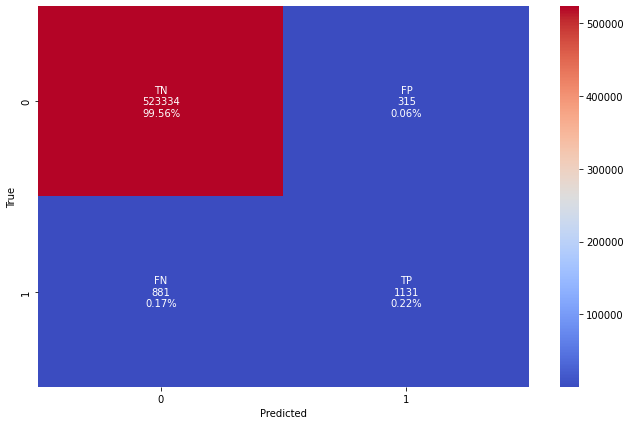

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.78      0.56      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.78      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [290]:
confusion_matrix_view(y_test, (pred_train>0.5).astype('int') )

## 변수 중요도

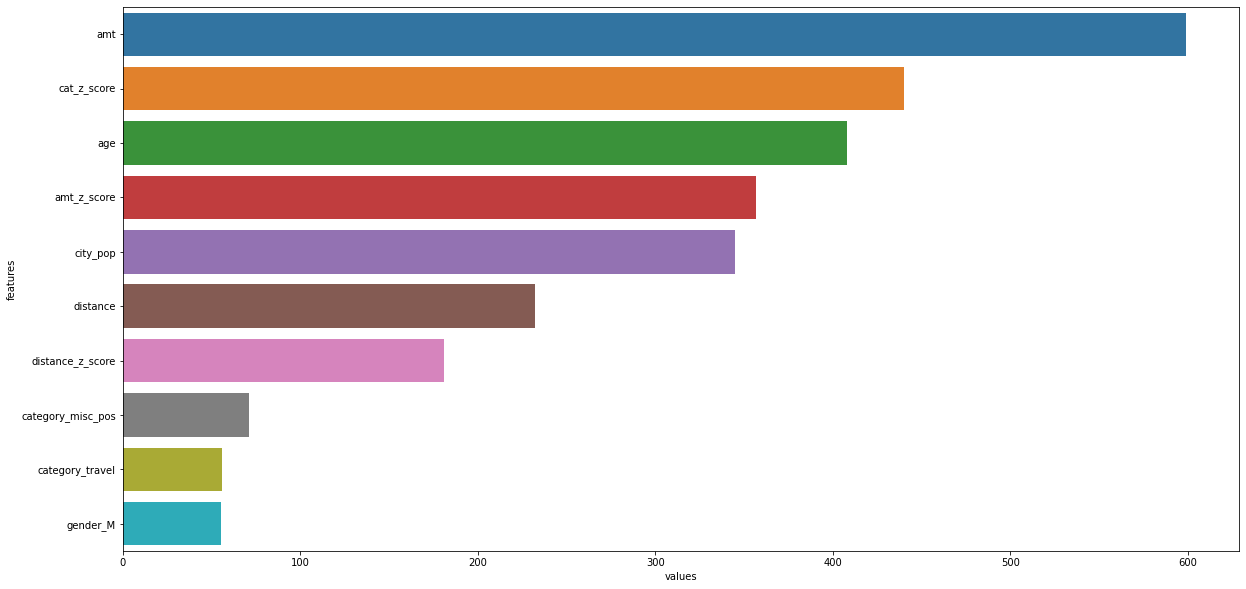

In [291]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()